Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import nolds

Reading csv file and ploting the Data

In [2]:
df = pd.read_csv('intern_dataset.csv')

In [3]:
df.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [4]:
df = df.dropna()

In [5]:
df['Label'].unique() 

array(['A', 'C', 'B'], dtype=object)

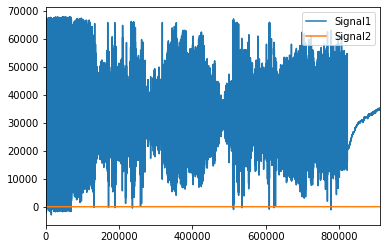

In [6]:
df.plot()
pd.to_datetime(df['Time'])
scaler = StandardScaler()
X_train = scaler.fit_transform(df[['Signal1','Signal2']])

In [5]:
X_train = df[df.columns[1:3]].values

In [6]:
X_train

array([[3.36680919e+04, 8.56725975e-01],
       [3.25649030e+04, 8.56705345e-01],
       [3.14540433e+04, 8.56683176e-01],
       ...,
       [3.46719676e+04, 1.51372892e-01],
       [3.46708779e+04, 1.51358824e-01],
       [3.46696949e+04, 1.51342453e-01]])

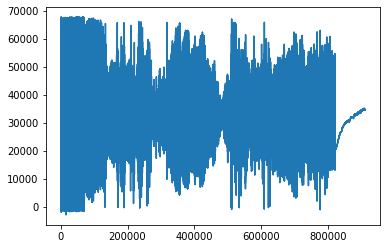

In [7]:
plt.plot(X_train[:,0])

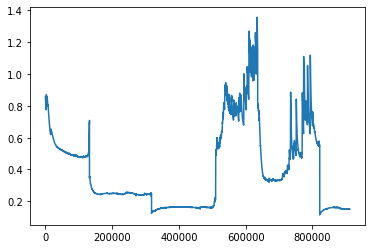

In [8]:
plt.plot(X_train[:,1])

## Fractal analysis with Lyapunov Exponent

Basically, the Lyapunov exponent is just a time average of  log∣f′(xi)∣  at every state the system visits over the course of the simulation. Here is an example of computing the Lyapunov exponent for the time-discrete system  xt+1=xt+r−x2t  over varying  r:
Positive Lyapunov exponents indicate chaos and unpredictability. Provides the algorithm of Rosenstein et al. (1993) to estimate the largest Lyapunov exponent and the algorithm of Eckmann et al. (1986) to estimate the whole spectrum of Lyapunov exponents.

The Lyapunov exponent hence indicates how rapidly a complex system of several interdependent dynamics tends to run up to deterministic chaos. The inverse value of the exponent indicates the so-called Lyapunov time, the time an initial difference needs to reach  e , thus allowing certain conclusions about the predictability of a system. Knowing Lyapunov time enables to estimate for what time period a system can be expected to be predictable.

D:\anaconda\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 65140
  warnings.warn(msg.format(lag), RuntimeWarning)


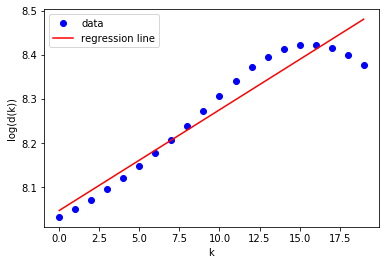

0.011406081780455216

In [44]:
nolds.lyap_r(X_train[:,0], emb_dim=15, min_tsep=0, tau=2,min_neighbors=20, 
             trajectory_len=20, fit='RANSAC', debug_plot=True, plot_file=None)

D:\anaconda\lib\site-packages\nolds\measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 53645
  warnings.warn(msg.format(lag), RuntimeWarning)


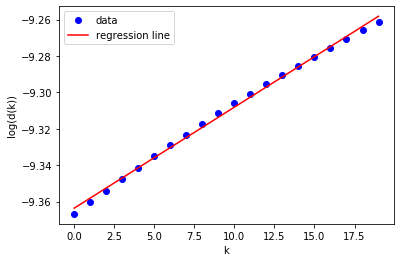

0.002775473343698479

In [41]:
nolds.lyap_r(X_train[:,1], emb_dim=18, min_tsep=0, tau=2,min_neighbors=18, 
             trajectory_len=20,fit='RANSAC', debug_plot=True, plot_file=None)

## Fractal analysis with Hurst Exponent
The Hurst exponent is a measure for the “long-term memory” of a time series, It relates to the autocorrelations of the time series, and the rate at which these decrease as the lag between pairs of values increases.
A value H in the range 0.5–1 indicates a time series with long-term positive autocorrelation

A value of H=0.5 can indicate a completely uncorrelated series

if H < 0.5 there are negative long-range correlations, 

if H > 0.5 there are positive long-range correlations

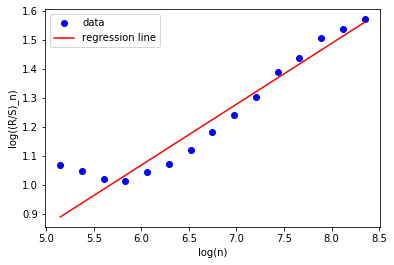

(0.7095860476116933,
 (array([5.14749448, 5.37527841, 5.60211882, 5.83188248, 6.06145692,
         6.28971557, 6.51914729, 6.74758653, 6.97634807, 7.20489251,
         7.43366654, 7.66199756, 7.89095672, 8.11969625, 8.34830105]),
  array([3.79872021, 3.89988682, 3.99176239, 4.10413564, 4.25611966,
         4.40177943, 4.57108295, 4.74955057, 4.92521938, 5.10781431,
         5.30889107, 5.47482893, 5.66009469, 5.80772022, 5.9575756 ]),
  array([ 0.20958605, -0.18770183])))

In [20]:
nolds.hurst_rs(X_train[:,0], nvals=None, fit=u'RANSAC', 
               debug_plot=True, debug_data=True, 
               plot_file=None, corrected=True, unbiased=True)

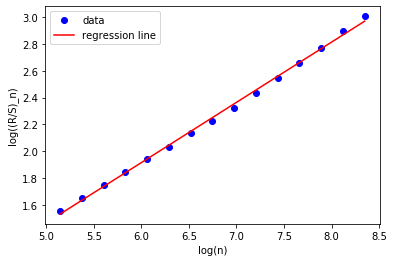

(0.9492091622165162,
 (array([5.14749448, 5.37527841, 5.60211882, 5.83188248, 6.06145692,
         6.28971557, 6.51914729, 6.74758653, 6.97634807, 7.20489251,
         7.43366654, 7.66199756, 7.89095672, 8.11969625, 8.34830105]),
  array([4.28336051, 4.50387115, 4.71605315, 4.93443579, 5.14859439,
         5.36055345, 5.58244975, 5.79298002, 6.01038394, 6.23949185,
         6.46238537, 6.69680269, 6.91944338, 7.16350189, 7.39235092]),
  array([ 0.44920916, -0.77975357])))

In [21]:
nolds.hurst_rs(X_train[:,1], nvals=None, fit=u'RANSAC', 
               debug_plot=True, debug_data=True, 
               plot_file=None, corrected=True, unbiased=True)

Interpretation:
As the Hurst Exponent is calculated for both Series(Signal1 and Signal2) and the both provide the value of H above 0.5.
**(For signal1 0.70 and for Signal2 0.94 )**
So there is positive long-range correlation between the data.

## Fractal analysis with Higuchi’s Fractal Dimensions


In [14]:
import hfda

In [46]:
k_max = 5
fract_one = hfda.measure(X_train[:,0], k_max)
fract_one

1.0066366747024633

In [48]:
fract_two = hfda.measure(X_train[:,1], k_max)
fract_two

1.0002017709289635

## Fractal analysis using Detrended fluctuation analysis

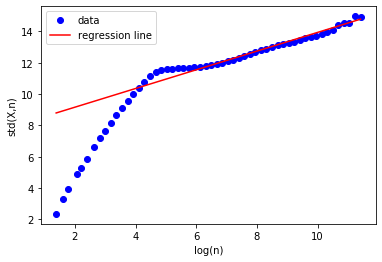

(0.5975635596126209,
 (array([ 1.38629436,  1.60943791,  1.79175947,  2.07944154,  2.19722458,
          2.39789527,  2.63905733,  2.83321334,  2.99573227,  3.17805383,
          3.36729583,  3.55534806,  3.73766962,  3.93182563,  4.11087386,
          4.29045944,  4.47733681,  4.66343909,  4.84418709,  5.03043792,
          5.21493576,  5.39362755,  5.5759491 ,  5.75890177,  5.94279938,
          6.12468339,  6.30809844,  6.49072353,  6.67329797,  6.8554088 ,
          7.03790596,  7.22037384,  7.40245152,  7.58477308,  7.767264  ,
          7.94979722,  8.13211877,  8.31434234,  8.49678638,  8.67914196,
          8.86135011,  9.04369529,  9.22611529,  9.40837122,  9.59076114,
          9.77303712,  9.95536817, 10.13768973, 10.32002447, 10.50235153,
         10.6846914 , 10.86700532, 11.04933324, 11.2316495 , 11.41397768]),
  array([ 2.34436083,  3.27103321,  3.92779327,  4.88410821,  5.25851344,
          5.87965019,  6.60391275,  7.17163376,  7.63439439,  8.14053521,
          8.643

In [23]:
nolds.dfa(X_train[:,0], nvals= None, overlap=True, order=2, fit_trend=u'poly', fit_exp=u'RANSAC', 
          debug_plot=True, debug_data=True, plot_file=None)

According to this analysis,for **alpha = 0.5** we have no correlation or “memory”, for **0.5 < alpha < 1** we have a memory with positive correlation and for **alpha < 0.5** the correlation is negative.
So for the Signal1, value of **alpha is 0.64**, so positive correlation exist between the data of Signal1

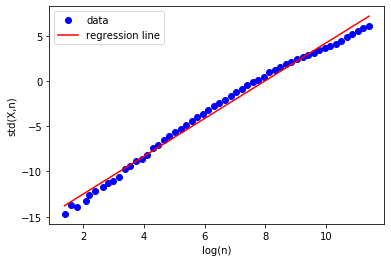

(2.0878928741158536,
 (array([ 1.38629436,  1.60943791,  1.79175947,  2.07944154,  2.19722458,
          2.39789527,  2.63905733,  2.83321334,  2.99573227,  3.17805383,
          3.36729583,  3.55534806,  3.73766962,  3.93182563,  4.11087386,
          4.29045944,  4.47733681,  4.66343909,  4.84418709,  5.03043792,
          5.21493576,  5.39362755,  5.5759491 ,  5.75890177,  5.94279938,
          6.12468339,  6.30809844,  6.49072353,  6.67329797,  6.8554088 ,
          7.03790596,  7.22037384,  7.40245152,  7.58477308,  7.767264  ,
          7.94979722,  8.13211877,  8.31434234,  8.49678638,  8.67914196,
          8.86135011,  9.04369529,  9.22611529,  9.40837122,  9.59076114,
          9.77303712,  9.95536817, 10.13768973, 10.32002447, 10.50235153,
         10.6846914 , 10.86700532, 11.04933324, 11.2316495 , 11.41397768]),
  array([-14.69461309, -13.70601291, -13.90679284, -13.30048088,
         -12.56559258, -12.1867617 , -11.71907093, -11.29735331,
         -11.10313583, -10.632721

In [24]:
nolds.dfa(X_train[:,1], nvals= None, overlap=True, order=2, fit_trend=u'poly', fit_exp=u'RANSAC', 
          debug_plot=True, debug_data=True, plot_file=None)

if alpha > 1 the underlying process is non-stationary and can be modeled as fractional Brownian motion. Here the value of **alpha is 1.800** for Signal2 data Series, so the process is non-stationary.

### Analysis

According to above analysis, it can be concluded that the Detrended fluctuation analysis provides the better result wrt computational cost associated with the dfa and more precise.